In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# 4 Obtain IRIS dataset from data
df_iris = data('iris')
df_iris.head()

# can use sns version also...

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# 4a PRINT first three rows
# df_iris.head(3) or
df_iris.loc[0:3,:]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# 4b Print the Shape
df_iris.shape # 150 rows by 5 cols

(150, 5)

In [5]:
# 4c print col names
df_iris.columns  # list(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# 4d print data types for each col
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# 4e print summary stats for each numeric variable
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DF from Google Sheet
- replace '/edit' with '/export'  
- add 'format=csv' to the beginning of the query string
- ex csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
- 

In [8]:
# import pandas as pd

# sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# df_googlesheet = pd.read_csv(csv_export_url)
# df_googlesheet.head()


In [9]:
# 5a read first 3 lines from titanic data
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


In [10]:
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
# 5b print the number of rows and cols
df_googlesheet.shape

(891, 12)

In [12]:
# 5c print col names
df_googlesheet.columns # or .to_list()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# 5d print dtypes
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# 5e print summary statistics for each numeric variable
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_googlesheet['PassengerId'].dtypes

dtype('int64')

In [16]:
# for col in df_googlesheet.columns:
#     if df_googlesheet[col].dtypes == 'object':
#         #if the string literal == adtype of object
#         print(f'{col} has {df_googlesheet.nunique()} unique values')

In [17]:
# 5f print unique values for each of the categorical variables
categories = [df_googlesheet.Survived.unique(),
             df_googlesheet.Pclass.unique(),
              df_googlesheet.SibSp.unique(),
             df_googlesheet.Parch.unique(),
             ]
print(categories)

[array([0, 1]), array([3, 1, 2]), array([1, 0, 3, 4, 2, 5, 8]), array([0, 1, 2, 5, 3, 4, 6])]


In [18]:
df_googlesheet['Embarked'].isna()
df_googlesheet['Embarked'].value_counts(dropna=False)
df_googlesheet['Embarked'].isna().sum()

2

In [19]:
# 6 download file into excel 
df_excel = pd.read_excel('train.xlsx')  #sheet_name='ddfs' is an arg to add
df_excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
# 6a assign first 100 rows to sample
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [21]:
# 6b print number of rows from original df
df_excel.index # df_excel.shape[0]

RangeIndex(start=0, stop=891, step=1)

In [22]:
# 6c print first 5 col names
df_excel_sample.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [23]:
## THIS IS MUCH EASIER TO GRAB dytpe of X!!!

# 6d print the column names that have dtype of object
df_excel_sample.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [24]:
df_excel_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          78 non-null     float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        20 non-null     object 
 11  Embarked     99 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [25]:
df_excel_sample.PassengerId.dtype

dtype('int64')

In [26]:
cols = df_excel_sample.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# 6e compute range for each numeric value
df_excel_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,100.0,50.500000,29.011492,1.000,25.75,50.500,75.250000,100.0
Survived,100.0,0.410000,0.494311,0.000,0.00,0.000,1.000000,1.0
Pclass,100.0,2.400000,0.816497,1.000,2.00,3.000,3.000000,3.0
Age,78.0,27.465769,15.278878,0.830,18.25,26.000,34.750000,71.0
SibSp,100.0,0.730000,1.179411,0.000,0.00,0.000,1.000000,5.0
Parch,100.0,0.440000,0.967346,0.000,0.00,0.000,0.000000,5.0
Fare,100.0,29.517625,40.972905,7.225,8.05,15.675,32.134375,263.0


In [28]:
df_excel_descr_T = df_excel_sample.describe().T
df_excel_descr_T

,count,mean,std,min,25%,50%,75%,max
PassengerId,100.0,50.500000,29.011492,1.000,25.75,50.500,75.250000,100.0
Survived,100.0,0.410000,0.494311,0.000,0.00,0.000,1.000000,1.0
Pclass,100.0,2.400000,0.816497,1.000,2.00,3.000,3.000000,3.0
Age,78.0,27.465769,15.278878,0.830,18.25,26.000,34.750000,71.0
SibSp,100.0,0.730000,1.179411,0.000,0.00,0.000,1.000000,5.0
Parch,100.0,0.440000,0.967346,0.000,0.00,0.000,0.000000,5.0
Fare,100.0,29.517625,40.972905,7.225,8.05,15.675,32.134375,263.0


In [29]:
df_excel_descr_T['range'] = (df_excel_descr_T['max'] - df_excel_descr_T['min'])
df_excel_descr_T

,count,mean,std,min,25%,50%,75%,max,range
PassengerId,100.0,50.500000,29.011492,1.000,25.75,50.500,75.250000,100.0,99.000
Survived,100.0,0.410000,0.494311,0.000,0.00,0.000,1.000000,1.0,1.000
Pclass,100.0,2.400000,0.816497,1.000,2.00,3.000,3.000000,3.0,2.000
Age,78.0,27.465769,15.278878,0.830,18.25,26.000,34.750000,71.0,70.170
SibSp,100.0,0.730000,1.179411,0.000,0.00,0.000,1.000000,5.0,5.000
Parch,100.0,0.440000,0.967346,0.000,0.00,0.000,0.000000,5.0,5.000
Fare,100.0,29.517625,40.972905,7.225,8.05,15.675,32.134375,263.0,255.775


In [30]:
import acquire as acq
import os

In [31]:
# 1 this function call will also create a .csv (which will be ignored by GIT)
# 4 functionality has been added already
acq.get_titanic_data('titanic_db')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [32]:
# 2 this function call will also create a .csv (which will be ignored by GIT)
# 4 functionality has been added already
acq.get_iris_data('iris_db')

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [33]:
# 3 this function call will also create a .csv (which will be ignored by GIT)
# 4 functionality has been added already
acq.get_telco_data('telco_churn')

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


## DATA PREPARE EX

In [34]:
# 1 Using IRIS data use acquire.py to load
import acquire as acq
iris_df = acq.get_iris_data('iris_db')
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [35]:
# 2 drop columns
iris_df.drop(columns=['species_id','measurement_id'],inplace=True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [36]:
# 3 Rename
iris_df.rename(columns={'species_name':'species'},inplace=True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [37]:
# 4 Create Dummy variables for species name and concat into iris_df
iris_df = pd.concat(
                    [iris_df,
                     pd.get_dummies(iris_df['species'], drop_first=True)],
                    axis=1)

In [38]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


In [39]:
import acquire as acq

In [40]:
# 5 Create a function which takes in df and outputs the above transformations

def prep_iris(df):
    '''
    prep iris will take in a single pandas dataframe
    and drop columns
    and aaddress NULLS
    and encoding cats
    '''
    #df = acq.get_iris_data('iris_db')
    df = df.drop(columns=['Unnamed: 0','species_id','measurement_id'],inplace=True)
    df = df.rename(columns={'species_name':'species'},inplace=True)
    df = pd.concat([df,pd.get_dummies(df['species'],drop_first=True)],axis=1)
    return df

In [41]:
#prep_iris(acq.get_iris_data('iris_db'))

In [42]:
df = iris_df
df

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


## USING TITANIC dataset

In [ ]:
from sklearn.impute import SimpleImputer
# # make the thing...
# #titanic
# my_imputer = SimpleImputer(strategy='mean')
# #fit the thing...
# my_imputer.fit(titanic_df['age'])
# #use the thng
# titanic['age'] = my_imputer.transform(titanic_df['age'])

# then use the imputer to fill in missingness for TRAIN data initialy...
# then add that imputation process to validate and TEST data...
# ie your IMPUTATION ASSUMPTIONS should be formulated based on TRAIN data, not WHOLE data or any part of TEST


In [ ]:
# load titanic via acquire.py
df = acq.get_titanic_data('titanic_db')
df.head()

In [ ]:
def prep_titanic(df):
    '''
    Accepts a df and drops unneeded columns, imputes missing values, and encodes cats
    '''
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    # impute average age and most common embark_town:
    df['age'] = df['age'].fillna(df.age.mean())
    df['embark_town'] = df['embark_town'].fillna('Southampton')
    # encode categorical values:
    df = pd.concat(
    [df, pd.get_dummies(df[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    return df

In [ ]:
prep_titanic(acq.get_titanic_data('titanic_db'))

## USING TELCO dataset

In [ ]:
# POTENTIAl issues with telco...appear to be no NULLS
df.isna().sum()

In [ ]:
df.isna().mean()

In [ ]:
df.isna().sum()[df.isna().sum() > 0]

In [ ]:
# # which are cats?
# dont_encode = []
# encode = []
# binaries = []

# # for col in df.columns:
# #     if df[col].dtype == 'O':
#           if telco[col].nunique() > 5:
#              dont_encode.append(col)
#           elif telco[col].nunique() > 5:
#              binaries.append(col)
#           else:
#              encode.append[col]

In [ ]:
df.gender.unique()

In [ ]:
df.gender.map({'Female':1,
              'Male':0})

In [ ]:
pd.get_dummies(df[['gender']],drop_first=True)

In [ ]:
df.customer_id.nunique()

In [ ]:
# load telco via acquire.py
df = acq.get_telco_data('telco_churn')
df.head()

In [ ]:
def prep_telco(df):
    '''
    Accepts a df and drops unneeded columns, imputes missing values, and encodes cats
    '''
    
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])

    # encode categorical values:
    df = pd.concat(
    [df, pd.get_dummies(df[['gender', 'senior_citizen','partner','dependents','tech_support','streaming_tv',
                           'streaming_movies','paperless_billing','churn','contract_type',
                            'internet_service_type','payment_type']],
                        drop_first=True)], axis=1)
    return df

In [ ]:
df = prep_telco(acq.get_telco_data('telco_churn'))
df.head()

## SPLIT the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
train_val,test = train_test_split(df,train_size=0.8,random_state=2013,stratify=df['churn_Yes'])

In [ ]:
train_val.shape, test.shape

In [ ]:
train, validate = train_test_split(train_val, train_size=0.7,random_state=2013,
                                   stratify=train_val['churn_Yes'])

In [ ]:
#1 this function also exists in prepare.py as prp
def split_data(df, target):
    '''
    split_data will split data into train,val,test based on 
    the values present in a cleaned version of df.  By default, data will be stratified
    by the target label
    
    '''
    train_val, test = train_test_split(df,train_size=0.8,random_state=2013,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,train_size=0.7,random_state=2013,
                                   stratify=train_val[target])
    return train, validate, test

In [ ]:
import prepare as prp
df = iris_df
df.head()

In [ ]:
#2 run prp.split_data on the iris dataset.  This should yield train_iris,validate_iris, and test_iris
prp.split_data(df,'species')

In [ ]:
train_iris,validate_iris,test_iris = prp.split_data(df,'species')
train_iris.shape

In [ ]:
#3 run prp.split_data on the Titanic dataset.  This should yield train_titanic,validate_titanic, and test_titanic
df = prep_titanic(acq.get_titanic_data('titanic_db'))
df.head()

In [ ]:
prp.split_data(df,'survived')

In [ ]:
train_titanic,validate_titanic,test_titanic = prp.split_data(df,'survived')
train_titanic.shape

In [ ]:
df = prep_telco(acq.get_telco_data('telco_churn'))
df.head()

In [ ]:
#4 run prp.split_data on the Telco dataset.  This should yield train_telco,validate_telco, and test_telco
train_telco,validate_telco,test_telco = prp.split_data(df,'churn_Yes')

In [ ]:
train_telco.shape

In [ ]:
test_telco

### EXPLORE exercises

In [60]:
# Part 1 using iris_db
# 1 Using IRIS data use acquire.py to load
import acquire as acq
iris = acq.get_iris_data('iris_db')
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [50]:
import prepare as prp


In [62]:
iris = iris.drop(columns=['species_id','measurement_id'])


In [63]:
iris = iris.rename(columns={'species_name':'species'})

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
train_iris,validate_iris,test_iris = prp.split_data(iris,'species')
train_iris.shape,validate_iris.shape,test_iris.shape

((84, 5), (36, 5), (30, 5))

In [68]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env
import acquire as acq
import prepare as prp
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [69]:
# 2 UNIVARIATE STATS
train_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:
# Separate Cats from Nums
cat_cols,num_cols = [],[]
for col in train_iris.columns:
    if train_iris[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train_iris[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [71]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

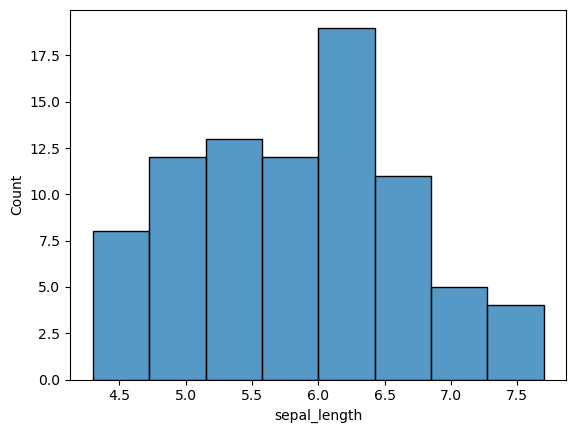

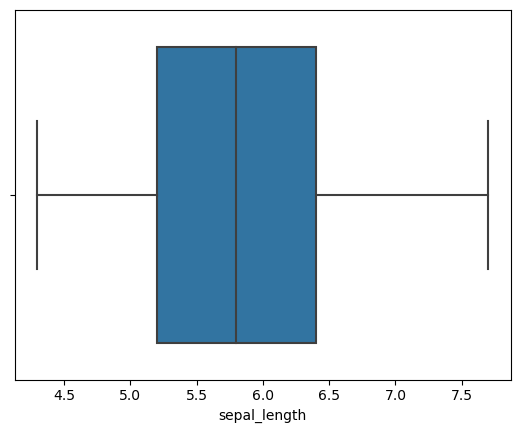

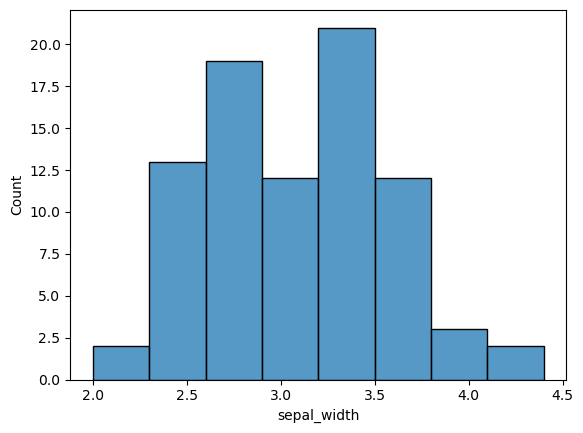

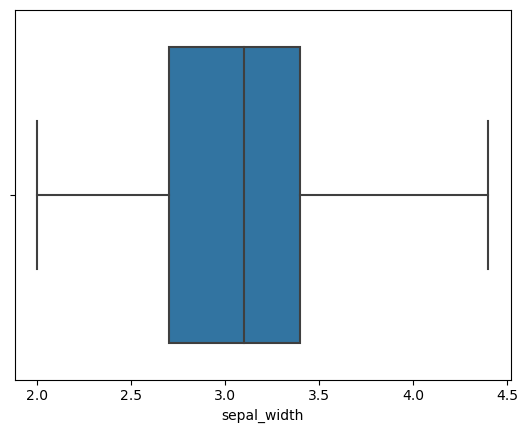

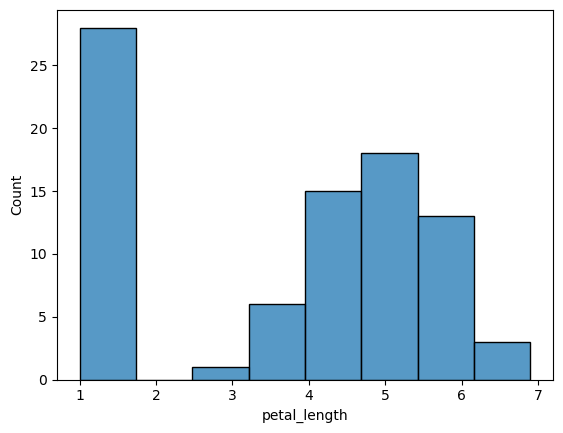

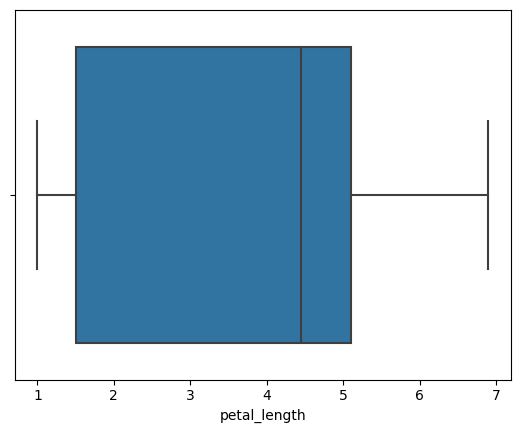

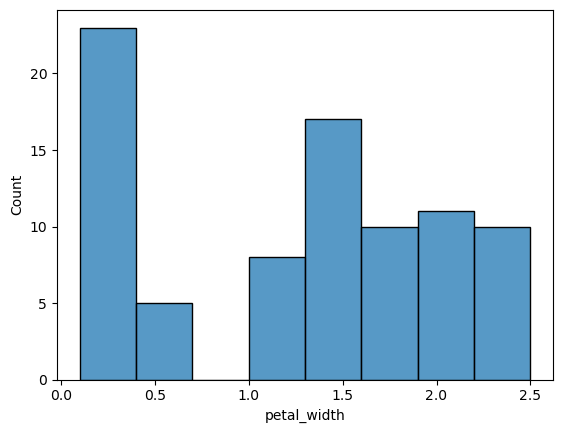

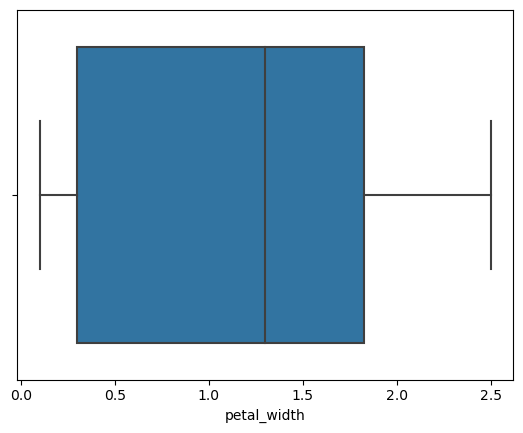

In [76]:
# For each Num col, show hist/boxplot/describe()
for col in num_cols:
    sns.histplot(data=train_iris, x=col)
    plt.show()
    sns.boxplot(data=train_iris, x=col)
    plt.show()
    train_iris[col].describe()

In [78]:
cat_cols

['species']

Univariate assess feature species:


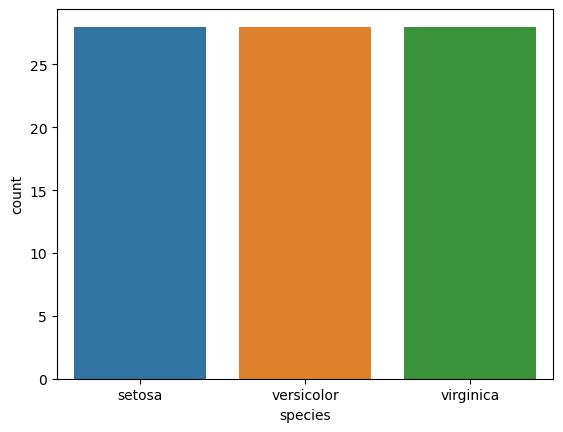

            species   species
setosa           28  0.333333
versicolor       28  0.333333
virginica        28  0.333333


In [77]:
# 2 For each Cat, create freq table and a bar plot
for col in cat_cols:
    print(f'Univariate assess feature {col}:')
    sns.countplot(data=train_iris,x=col)
    plt.show()
    print(
    pd.concat([train_iris[col].value_counts(),
               train_iris[col].value_counts(normalize=True)],
              axis=1))

In [84]:
train_iris.shape
test_iris.shape

(30, 5)

In [ ]:
# TAKEAwAYS
'''
-All 3 SPECIES are equally represented in TRAINING SET

-Asssumption of NOrmality applies to : Sepal Length,Sepal Width,

-Petal Width and Petal Length are bi-modal, however the greater leaf surface areas are NORMALLY DISTRIBUTED
 in the case of Petal Length

'''

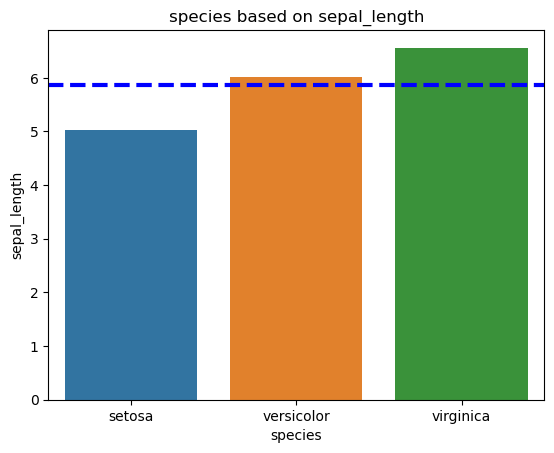

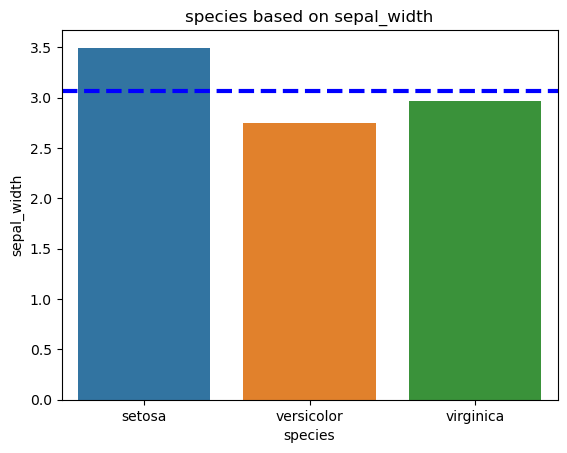

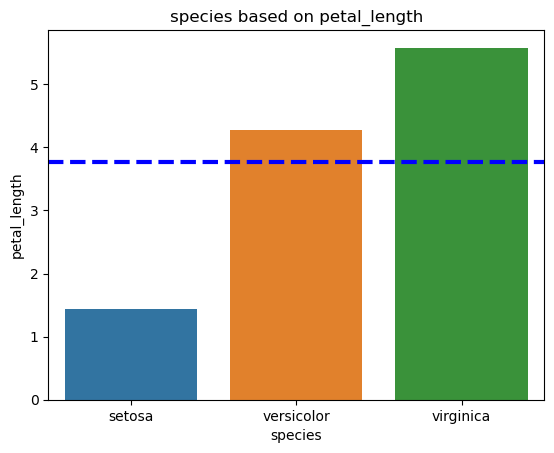

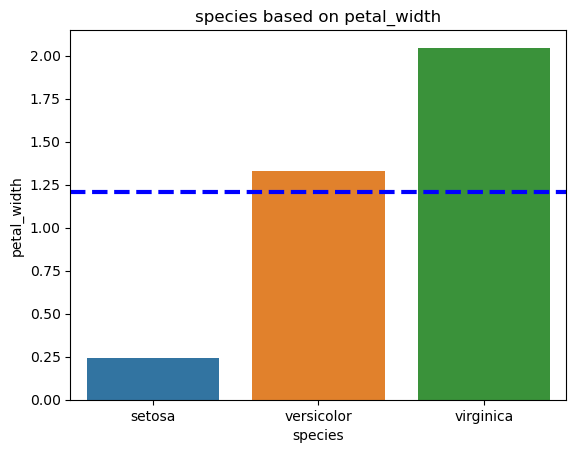

In [95]:
#LOOK at Bivariate Comparisons
# check each num with target
for col in num_cols:
    sns.barplot(data=train_iris,x='species', y=col,ci=False)
    plt.axhline(train_iris[col].mean(),color="blue", linestyle="dashed",linewidth=3)
    plt.title(f'species based on {col}')
    plt.show()

In [104]:
# calculate descriptive stats for each num_col all cols are num_cols
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.865476,3.071429,3.763095,1.205952
std,0.837019,0.487326,1.798646,0.773873
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.700000,1.500000,0.300000
50%,5.800000,3.100000,4.450000,1.300000
75%,6.400000,3.400000,5.100000,1.825000
max,7.700000,4.400000,6.900000,2.500000


In [102]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [105]:
for col in num_cols:
    train_iris[col].describe()

In [101]:
train_iris.sepal_length.describe()

count    84.000000
mean      5.865476
std       0.837019
min       4.300000
25%       5.200000
50%       5.800000
75%       6.400000
max       7.700000
Name: sepal_length, dtype: float64

In [113]:
# compare virginica and versicolor mean PETL_WIDTH using Mann-Whitney
virginica = train_iris[train_iris.species=='virginica'].petal_width
versicolor = train_iris[train_iris.species=='versicolor'].petal_width

In [114]:
alpha = 0.05
stat, p = stats.mannwhitneyu(virginica, versicolor)

In [115]:
stat,p # with a p_value of near-zero...there is evidence to suggest that a diff exists between the mean of 
# petal_width for verginica and versicolor

(769.0, 5.916082654114028e-10)